In [0]:
# !curl 'https://raw.githubusercontent.com/dmlc/xgboost/master/demo/guide-python/sklearn_examples.py' -o 'sklearn_examples.py'
import pandas as pd
import xgboost as xgb
import numpy as np

In [0]:
N = 100
train_data = pd.DataFrame(
    np.random.rand(N,4),
    columns=list('abcd'),
#     dtype = int
)
label = np.random.randint(2,size=N)

test_data = pd.DataFrame(
    np.random.randint(10,size=(N,4)),
    columns=list('abcd')
)

dtrain = xgb.DMatrix(train_data, label=label) 
dtest = xgb.DMatrix(test_data, label=label) 

In [57]:
param = {'max_depth': 3, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.512646	train-auc:0.817342
[1]	eval-auc:0.515456	train-auc:0.897631
[2]	eval-auc:0.418306	train-auc:0.937375
[3]	eval-auc:0.417503	train-auc:0.962264
[4]	eval-auc:0.408671	train-auc:0.981734
[5]	eval-auc:0.408671	train-auc:0.988157
[6]	eval-auc:0.409073	train-auc:0.995986
[7]	eval-auc:0.431554	train-auc:0.995584
[8]	eval-auc:0.433561	train-auc:0.996788
[9]	eval-auc:0.423123	train-auc:0.998796
[10]	eval-auc:0.423123	train-auc:1
[11]	eval-auc:0.423123	train-auc:1
[12]	eval-auc:0.421919	train-auc:1
[13]	eval-auc:0.423525	train-auc:1
[14]	eval-auc:0.423525	train-auc:1
[15]	eval-auc:0.423525	train-auc:1
[16]	eval-auc:0.423525	train-auc:1
[17]	eval-auc:0.422722	train-auc:1
[18]	eval-auc:0.423123	train-auc:1
[19]	eval-auc:0.423123	train-auc:1
[20]	eval-auc:0.423123	train-auc:1
[21]	eval-auc:0.423123	train-auc:1
[22]	eval-auc:0.423123	train-auc:1
[23]	eval-auc:0.423123	train-auc:1
[24]	eval-auc:0.423123	train-auc:1
[25]	eval-auc:0.423525	train-auc:1
[26]	eval-auc:0.423525	train-a

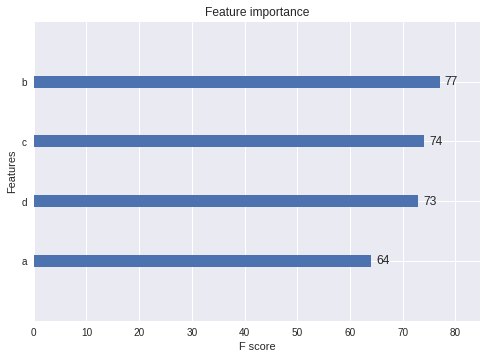

In [58]:
xgb.plot_importance(bst)
# bst.get_score()

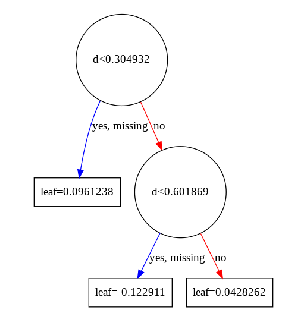

In [49]:
xgb.plot_tree(bst, num_trees=80)

# Multiclass  

In [50]:
rows, cols = 1256, 250
train_data = pd.DataFrame(
    np.random.rand(rows,cols),
    columns=['c{}'.format(x) for x in range(cols)],
#     dtype = int
)

species = 6

train_label = np.random.randint(species,size=rows)

test_data  = pd.DataFrame(
    np.random.rand(110,cols),
    columns=['c{}'.format(x) for x in range(cols)]
)

test_label = np.random.randint(species,size=110)
dtrain = xgb.DMatrix(train_data, label=train_label) 
dtest = xgb.DMatrix(test_data, label=test_label) 

param = {'max_depth': species, 'eta': 0.1, 'silent': 1, 'objective': 'multi:softmax',
        'num_class': species}
# param['nthread'] = 4
param['eval_metric'] = 'mlogloss'

evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 50
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-mlogloss:1.79263	train-mlogloss:1.71387
[1]	eval-mlogloss:1.79027	train-mlogloss:1.63669
[2]	eval-mlogloss:1.79287	train-mlogloss:1.56591
[3]	eval-mlogloss:1.79499	train-mlogloss:1.50231
[4]	eval-mlogloss:1.80069	train-mlogloss:1.4305
[5]	eval-mlogloss:1.79616	train-mlogloss:1.36783
[6]	eval-mlogloss:1.79863	train-mlogloss:1.30388
[7]	eval-mlogloss:1.79498	train-mlogloss:1.24314
[8]	eval-mlogloss:1.80263	train-mlogloss:1.1892
[9]	eval-mlogloss:1.79676	train-mlogloss:1.12748
[10]	eval-mlogloss:1.80357	train-mlogloss:1.07927
[11]	eval-mlogloss:1.79904	train-mlogloss:1.03433
[12]	eval-mlogloss:1.79701	train-mlogloss:0.991818
[13]	eval-mlogloss:1.79787	train-mlogloss:0.951127
[14]	eval-mlogloss:1.80473	train-mlogloss:0.91011
[15]	eval-mlogloss:1.80848	train-mlogloss:0.872014
[16]	eval-mlogloss:1.80768	train-mlogloss:0.833917
[17]	eval-mlogloss:1.81047	train-mlogloss:0.801493
[18]	eval-mlogloss:1.81713	train-mlogloss:0.771813
[19]	eval-mlogloss:1.81626	train-mlogloss:0.744234
[20]	

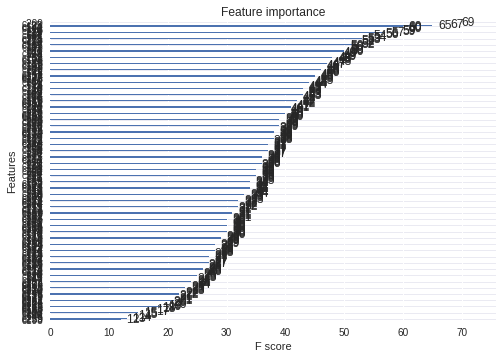

In [51]:
xgb.plot_importance(bst)
# xgb.plot_tree(bst, num_trees=85)

In [24]:
!curl 'https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data' -o 'dermatology.data'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25964  100 25964    0     0  70363      0 --:--:-- --:--:-- --:--:-- 70363


[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softmax = 0.09090909090909091
[0]	train-merror:0.011719	test-merror:0.127273
[1]	train-merror:0.015625	test-merror:0.127273
[2]	train-merror:0.011719	test-merror:0.109091
[3]	train-merror:0.007812	test-merror:0.081818
[4]	train-merror:0.007812	test-merror:0.090909
Test error using softprob = 0.09090909090909091


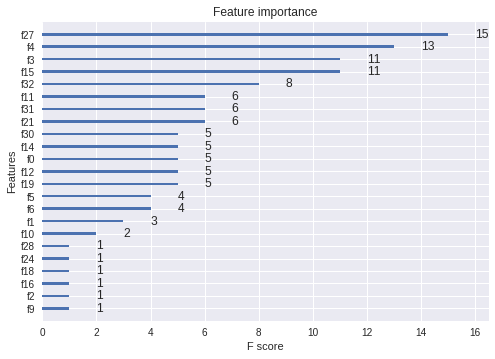

In [52]:
from __future__ import division

import numpy as np
import xgboost as xgb

# label need to be 0 to num_class -1
data = np.loadtxt('dermatology.data', delimiter=',',
        converters={33: lambda x:int(x == '?'), 34: lambda x:int(x) - 1})
sz = data.shape

train = data[:int(sz[0] * 0.7), :]
test = data[int(sz[0] * 0.7):, :]

train_X = train[:, :33]
train_Y = train[:, 34]

test_X = test[:, :33]
test_Y = test[:, 34]

xg_train = xgb.DMatrix(train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = 6

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 5
bst = xgb.train(param, xg_train, num_round, watchlist)
# get prediction
pred = bst.predict(xg_test)
error_rate = np.sum(pred != test_Y) / test_Y.shape[0]
print('Test error using softmax = {}'.format(error_rate))

# do the same thing again, but output probabilities
param['objective'] = 'multi:softprob'
bst = xgb.train(param, xg_train, num_round, watchlist)
# Note: this convention has been changed since xgboost-unity
# get prediction, this is in 1D array, need reshape to (ndata, nclass)
pred_prob = bst.predict(xg_test).reshape(test_Y.shape[0], 6)
pred_label = np.argmax(pred_prob, axis=1)
error_rate = np.sum(pred_label != test_Y) / test_Y.shape[0]
print('Test error using softprob = {}'.format(error_rate))

xgb.plot_importance( bst )

(366, 35)